# Lab 7: Springs I

$\textbf{Objective}$

The objective of this experiment is to analyze the motion of a spring and find the spring constant, $k$, of a rubber band using simple harmonic motion and Hooke's Law.

$\textbf{Theory}$

**1. Hooke's Law**
According to Hooke's Law, the force acting on a spring is given by:
$$
F = -k(x-x_0)
$$
where:
* $F$ is the force exerted on the spring
* $x$ is the length of the spring when it is extended or compressed
* $x_0$ is the length of the spring at its equilibrium position
* $k$ is the spring constant

Here, $k$ corresponds to the slope of the Force vs. Position graph.

**2. Simple Harmonic Motion (SHM)**
For an oscillating spring-mass system, the angular frequency is:
$$
\omega = \sqrt{\frac{k}{m}}
$$

Using the relationship $\omega = \frac{2\pi}{T}$ and accounting for the effective mass of the spring, we get the linearized equation:

$$
3m = k\left(\frac{3T^2}{4\pi^2}\right) - m_s
$$
where:
* $m$ is the mass attached to the spring (rubber band)
* $k$ is the spring constant
* $T$ is the time period for a complete oscillation
* $m_s$ is the mass of the spring (rubber band)

In a graph of $3m$ vs. $\frac{3T^2}{4\pi^2}$, $k$ corresponds to the slope.

$\textbf{Experiment Method/Procedure}$

**Method 1: Hooke's Law**
The force and change in extension of the rubber band were recorded. The equilibrium position $x_0$ was fixed by hanging a mass hanger of mass $m_0$.
Different masses were added, ranging from 0.5 kg to 2.5 kg. The force acting on the band was calculated as gravity, $F = mg$.

The data was recorded in `lab7-1.csv` containing the change in length ($\Delta x$) and the Force. The file was uploaded to Python, and a scatter plot of **Force vs. $\Delta x$** was generated. The slope of the linear fit was used to find $k$.

**Method 2: Simple Harmonic Motion**
Using the same mass range (0.5 kg to 2.5 kg), the rubber band system was set into oscillation. The time period ($T$) for oscillations was measured for each mass, along with uncertainties.

The data was recorded in `lab7-2.csv`. A plot of **$3m$ vs. $\frac{3T^2}{4\pi^2}$** was generated in Python, where the slope represents the spring constant $k$.

$\textbf{Results}$

From the analysis in Python, the spring constant determined using Hooke's Law was:
$$
k = 94.2 \pm 1.8 \, \text{N/m}
$$

The spring constant determined using Simple Harmonic Motion was:
$$
k = 46.2 \pm 3.7 \, \text{N/m}
$$

$\textbf{Discussion}$

The images `lab07-1.jpeg` and `lab07-2.jpeg` represents the linearized plots with the slope being equal to the spring constant (k) of the rubber band.


The difference between the two spring constants is $\Delta k = |94.2 - 46.2| = 48.0 \, \text{N/m}$. The combined uncertainty is $\delta k = 1.8 + 3.7 = 5.5 \, \text{N/m}$. This discrepancy is significantly greater than the experimental uncertainty.

To conclude, the value of the spring constant found using Hooke's Law is likely more accurate for static situations. The discrepancy arises because the Hooke's Law model relies on simple equilibrium forces, whereas the SHM model assumes the rubber band acts as an ideal spring. In reality, rubber bands exhibit non-linear behavior and hysteresis, meaning their dynamic stiffness (during oscillation) often differs from their static stiffness (during stretching).

The experimental precision could be improved by replacing manual timing with a photogate or motion sensor to measure the oscillation period $T$, thereby eliminating human reaction time error. Additionally, recording the oscillation using a high-frame-rate camera and analyzing the footage with software such as Tracker would allow for precise frame-by-frame determination of the period.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

Hooke's law
The slope is 94.22238640561507 [1/nm] +/- 1.8119689693387502 [1/nm] and the intercept is 0.38015108976726975[1/nm] +- 0.05603644037987801 [1/nm]


/tmp/ipykernel_805/3064790142.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = legend_title,loc='best',prop={'size':20})


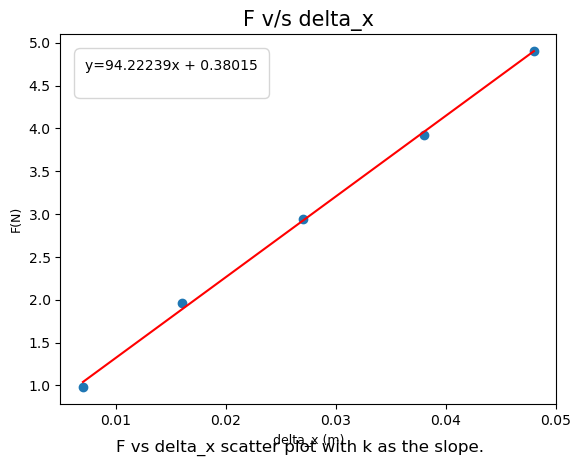

In [2]:
csv_data = pd.read_csv("lab7-1.csv")
F = csv_data["F"] 
delta_x = csv_data["deltax"]
F = np.array(F)
delta_x = np.array(delta_x)

plt.scatter(delta_x,F)
plt.title("F v/s delta_x",fontsize=15)
plt.xlabel("delta_x (m)",fontsize=9)
plt.ylabel("F(N)",fontsize=9)

coeffs, uncertainty = np.polyfit(delta_x, F, 1, cov=True)
slope = coeffs[0]
print("Hooke's law")
intercept = coeffs[1]
linear_fit = slope * delta_x + intercept
slope_uncer = np.sqrt(uncertainty[0,0])
intercept_uncer = np.sqrt(uncertainty[1,1])
print(f"The slope is {coeffs[0]} [1/nm] +/- {slope_uncer} [1/nm] and the intercept is {coeffs[1]}[1/nm] +- {intercept_uncer} [1/nm]")
legend_title = f"y={slope:.5f}x + {intercept:.5f}"
plt.legend(title = legend_title,loc='best',prop={'size':20})
plt.plot(delta_x,linear_fit,color = 'red')

caption = "F vs delta_x scatter plot with k as the slope."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('lab07-1.jpeg')
plt.show()

Simple Harmonic Motion
The slope is 46.23853851989755 [1/nm] +/- 3.7358174449585952 [1/nm] and the intercept is -0.925446789260336[1/nm] +- 0.128351597645984 [1/nm]


/tmp/ipykernel_805/257886314.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title = legend_title,loc='best',prop={'size':20})


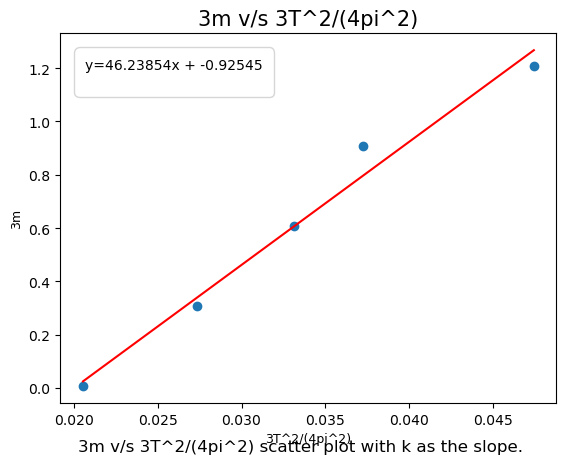

In [3]:
csv_data = pd.read_csv("lab7-2.csv")
x = csv_data["x"] 
y = csv_data["y"]
x = np.array(x)
y = np.array(y)

plt.scatter(x,y)
plt.title("3m v/s 3T^2/(4pi^2)",fontsize=15)
plt.xlabel("3T^2/(4pi^2)",fontsize=9)
plt.ylabel("3m",fontsize=9)

coeffs, uncertainty = np.polyfit(x, y, 1, cov=True)
slope = coeffs[0]
intercept = coeffs[1]
linear_fit = slope * x + intercept
slope_uncer = np.sqrt(uncertainty[0,0])
intercept_uncer = np.sqrt(uncertainty[1,1])
print("Simple Harmonic Motion")
print(f"The slope is {coeffs[0]} [1/nm] +/- {slope_uncer} [1/nm] and the intercept is {coeffs[1]}[1/nm] +- {intercept_uncer} [1/nm]")
legend_title = f"y={slope:.5f}x + {intercept:.5f}"
plt.legend(title = legend_title,loc='best',prop={'size':20})
plt.plot(x,linear_fit,color = 'red')

caption = "3m v/s 3T^2/(4pi^2) scatter plot with k as the slope."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('lab07-2.jpeg')
plt.show()